# PREDICTING THE STOCK MARKET

In this project I'll be using linear regression to try and predict the stock market. This dataset is using S&P 500 datasets. The dates of this dataset range from 1950 to 2015. The dataset is stored in the sphist.csv file.

The columns featured in the dataset include:

    Date - the date of the record

    Open - the opening price of the day(when trading starts)

    High - the highest trade price during the day

    Low - the lowest trade price during the day

    Close - the closing price for the day (when trading is finished)

    Volume - the number of shares traded

    Adj Close - the daily closing price, adjusted retroactively to include any corporate actions.

# INTRODUCTION 
#imporing the packages needed

In [3]:
import pandas as pd
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score


In [4]:
#Reading in the data
data = pd.read_csv('sphist.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', ascending=True, inplace=True)
data.reset_index(drop=True, inplace=True)
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66
1,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85
2,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93
3,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98
4,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08


# CREATING INDICATORS
Now we will be creating indicators that we can use to make predictions for the future. 

In [5]:
#Creating indicators
data['avg_5'] = data['Close'].rolling(5).mean().shift(1)
data['avg_30'] = data['Close'].rolling(30).mean().shift(1)
data['avg_365'] = data['Close'].rolling(365).mean().shift(1)

data['std_5'] = data['Close'].rolling(5).std().shift(1)
data['std_365']= data['Close'].rolling(365).std().shift(1)

data['avg_5/avg_365'] = data['avg_5']/data['avg_365']
data['std_5/std_365'] = data['std_5']/data['std_365']

data['Volume_5'] = data['Volume'].rolling(5).mean().shift(1)
data['Volume_30'] = data['Volume'].rolling(30).mean().shift(1)
data['Volume_365'] = data['Volume'].rolling(365).mean().shift(1)

In [6]:
#Dropping rows that do not contain enough data for the indicators
data[data['Date'] < datetime(year=1951, month=1, day=3)]
data.dropna(axis=0, inplace=True)

In [10]:
#Creating the train and testing dataset
train = data[data['Date'] < datetime(year=2013, month=1, day=1)]
test = data[data['Date'] >= datetime(year=2013, month=1, day=1)]



# INITIALIZING THE MODEL 

In [41]:
lr = LinearRegression()
lr.fit(train[["avg_5", "avg_30"]], train['Close'])
predictions = lr.predict(test[["avg_5", "avg_30"]])

# COMPUTING THE ERROR OF THE MODEL 

In [42]:
#Computing the error
mae = mean_absolute_error(test['Close'], predictions)
mse = mean_squared_error(test['Close'], predictions)
print('MAE:', mae)
print('MSE:', mse)

MAE: 16.149299962628902
MSE: 493.84765899072573


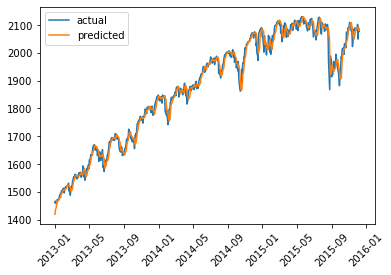

In [43]:
import matplotlib.pyplot as plt
plt.plot(test['Date'], test['Close'], label='actual')
plt.plot(test['Date'], predictions, label='predicted')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [19]:
test.head()

,Date,Open,High,Low,Close,Volume,Adj Close,avg_5,avg_30,avg_365,std_5,std_365,avg_5/avg_365,std_5/std_365,Volume_5,Volume_30,Volume_365,predictions,predictions
15851,2013-01-02,1426.189941,1462.430054,1426.189941,1462.420044,4.202600e+09,1462.420044,1418.641992,1414.258667,1327.534055,9.820801,90.463948,1.068629,0.108560,2.399036e+09,3.271409e+09,3.861288e+09,1419.354407,1419.354407
15852,2013-01-03,1462.420044,1465.469971,1455.530029,1459.369995,3.829730e+09,1459.369995,1425.793994,1417.676668,1327.908247,22.261321,90.738976,1.073714,0.245334,2.989764e+09,3.276632e+09,3.862480e+09,1425.505780,1425.505780
15853,2013-01-04,1459.369995,1467.939941,1458.989990,1466.469971,3.424290e+09,1466.469971,1433.702002,1420.092668,1328.224877,26.274326,90.995857,1.079412,0.288742,3.298704e+09,3.291797e+09,3.859719e+09,1433.379736,1433.379736
15854,2013-01-07,1466.469971,1466.469971,1456.619995,1461.890015,3.304970e+09,1461.890015,1443.376001,1422.714665,1328.557617,27.945242,91.279049,1.086423,0.306152,3.417526e+09,3.299034e+09,3.859449e+09,1443.360695,1443.360695
15855,2013-01-08,1461.890015,1461.890015,1451.640015,1457.150024,3.601600e+09,1457.150024,1455.267993,1425.076664,1328.898603,16.453319,91.544368,1.095093,0.179731,3.593184e+09,3.320297e+09,3.858814e+09,1457.055697,1457.055697


In [36]:
#Adding Volume as a variable to see if it imporves our model. It only changed it very slightly. But out model performance is not too bad given the error values
lr = LinearRegression()
lr.fit(train[["avg_5", "avg_30", "avg_365", "std_5", "std_365", "avg_5/avg_365", "std_5/std_365", "Volume_5", "Volume_30","Volume_365"]], train['Close'])
predictions_1 = lr.predict(test[["avg_5", "avg_30", "avg_365", "std_5", "std_365", "avg_5/avg_365", "std_5/std_365", "Volume_5", "Volume_30","Volume_365"]])

In [37]:
mae = mean_absolute_error(test['Close'], predictions_1)
mse = mean_squared_error(test['Close'], predictions_1)
print('MAE:', mae)
print('MSE:', mse)

MAE: 16.136972699233393
MSE: 493.9522170728897


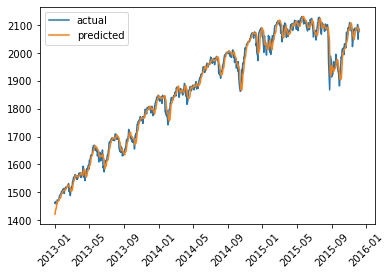

In [44]:
import matplotlib.pyplot as plt
plt.plot(test['Date'], test['Close'], label='actual')
plt.plot(test['Date'], predictions_1, label='predicted')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

CONCLUSION

The Linear Regression model can be used effectively to predict the stock market with an acceptable error. This can always be modified with the features that you include or modifying the model itself. As you can see from the plot above the predicted vs actual is very close